In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [14]:
df = pd.DataFrame(np.random.randint(0,1000,size=(100, 1)),columns=['test'])

<AxesSubplot:>

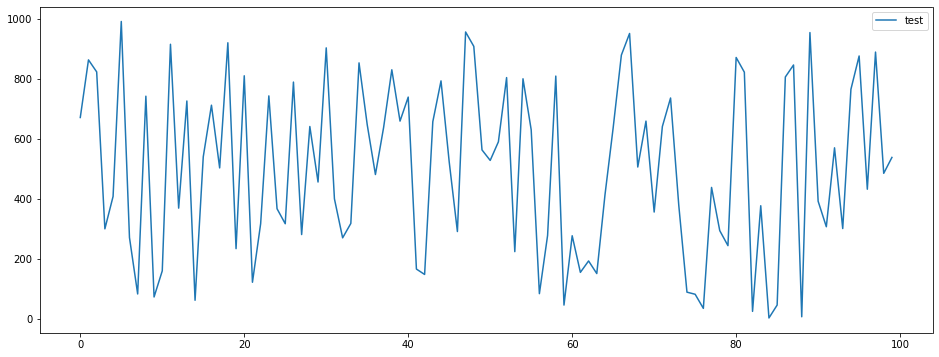

In [15]:
df.plot(figsize=(16,6))

In [16]:
ts=df.iloc[:,0]

In [6]:
def func_ex(x, a, b, c):#指数分布
    return a * np.exp(-b * x) + c#可能会溢出，但没有关系
def fit_ex(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_ex, xdata, ydata,maxfev=500000)
    
    plt.figure(dpi=300,figsize=(16,6))
    plt.plot(xdata, ydata, 'b-', label='data')# 可视化
    plt.plot(xdata, func_ex(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    #print(func_ex(xdata, *popt))#输出拟合数据
    plt.legend()
    plt.show()

In [7]:
def func_line(x, a, b):#一次
    return a * x + b
def fit_line(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_line, xdata, ydata,maxfev=500000)
    
    plt.figure(dpi=300,figsize=(16,6))
    plt.plot(xdata, ydata, 'b-', label='data')# 可视化
    plt.plot(xdata, func_line(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
    #print(func_ex(xdata, *popt))#输出拟合数据
    plt.legend()
    plt.show()

In [8]:
def func_two(x, a, b ,c):#二次
    return a * x * x + b * x + c
def fit_two(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_two, xdata, ydata)
    
    plt.figure(dpi=300,figsize=(16,6))
    plt.plot(xdata, ydata, 'b-', label='data')# 可视化
    plt.plot(xdata, func_two(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f,c=%5.3f' % tuple(popt))
    #print(func_ex(xdata, *popt))#输出拟合数据
    plt.legend()
    plt.show()

In [9]:
def func_three(x, a, b ,c,d):#三次
    return a * x * x * x + b * x * x + c * x + d
def fit_three(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_three, xdata, ydata)
    
    plt.figure(dpi=300,figsize=(16,6))
    plt.plot(xdata, ydata, 'b-', label='data')# 可视化
    plt.plot(xdata, func_three(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f,c=%5.3f,d=%5.3f' % tuple(popt))
    #print(func_ex(xdata, *popt))#输出拟合数据
    plt.legend()
    plt.show()

In [10]:
def func_logguass(x, a, b ,c,sigma):#对数高斯
    return a * np.exp(-(np.log(abs(x)+1e-15) - b) ** 2 / (2 * sigma ** 2)) + c
def fit_logguass(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_logguass, xdata, ydata,maxfev=500000)
    
    plt.figure(dpi=300,figsize=(16,6))
    plt.plot(xdata, ydata, 'b-', label='data')# 可视化
    plt.plot(xdata, func_logguass(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f,c=%5.3f,sigma=%5.3f' % tuple(popt))
    #print(func_ex(xdata, *popt))#输出拟合数据
    plt.legend()
    plt.show()

C:\Users\10942\AppData\Local\Temp/ipykernel_11764/4106644027.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c#可能会溢出，但没有关系


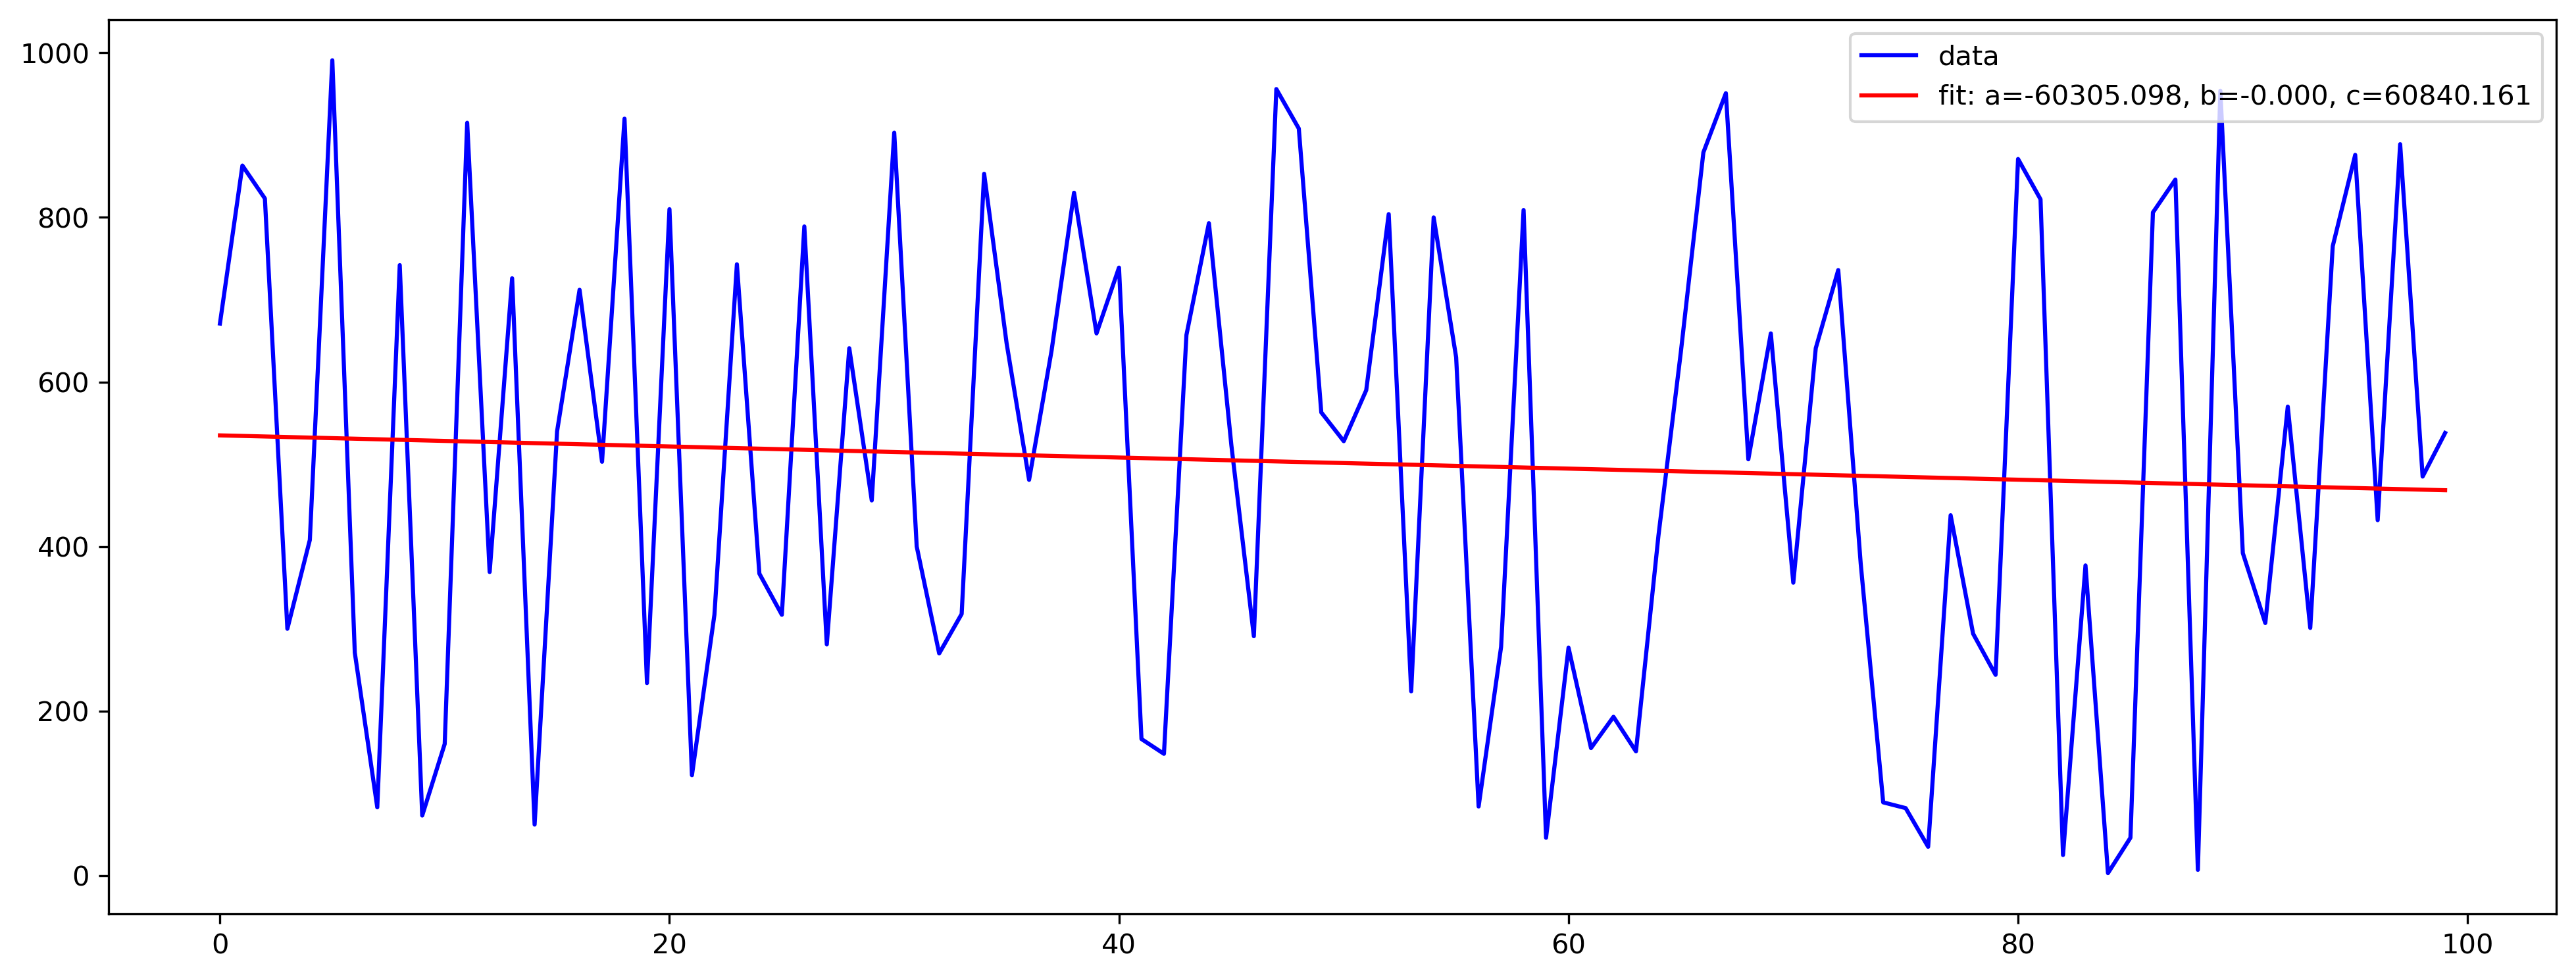

In [17]:
fit_ex(ts)

一组数据，输出拟合图片至docx

In [11]:
from io import StringIO
from docx import Document
from docx.shared import Inches
#需要python-docx包

In [12]:
def fit_ex_docx(ts):
    xdata=ts.index
    ydata=ts.values
    popt, pcov = curve_fit(func_ex, xdata, ydata,maxfev=500000)
    
    memfile = StringIO()
    plt.plot(xdata, ydata, 'b-', label='data')
    plt.plot(xdata, func_ex(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    #print( func_ex(xdata, *popt))
    plt.legend()
    plt.savefig('1.png')
    plt.show()
    document.add_picture('1.png', width=Inches(5))
    memfile.close()

In [18]:
df_new=pd.concat([df,df], axis=1)
#pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,keys=None, levels=None, names=None, verify_integrity=False)

In [19]:
df_new

,test,test
0,671,671
1,863,863
2,823,823
3,300,300
4,408,408
...,...,...
95,876,876
96,432,432
97,889,889
98,485,485


C:\Users\10942\AppData\Local\Temp/ipykernel_11764/4106644027.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c#可能会溢出，但没有关系


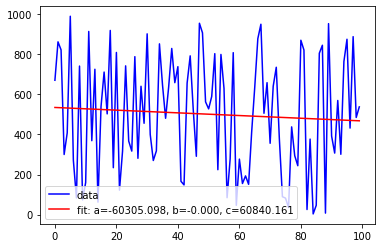

C:\Users\10942\AppData\Local\Temp/ipykernel_11764/4106644027.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c#可能会溢出，但没有关系


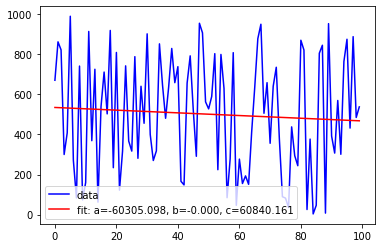

In [20]:
document = Document()
for i in range(2):
    fit_ex_docx(df_new.iloc[:,i])
document.save('./ex.docx')